<center> <b><font size="6">CRIME PREDICTION</font></b></center>



#### Read file into pandas dataframe:

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np
import os
import math
from sklearn import tree
from IPython.display import Image  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import pydotplus
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from scipy import stats

%matplotlib inline
dicPath = os.getcwd()
dicPathClean = os.path.join(dicPath,'Crime Prediction Data','communities-crime-clean.csv')
dicPathDirty = os.path.join(dicPath,'Crime Prediction Data','communities-crime-full.csv')

In [3]:
df=pd.read_csv(dicPathClean)
dfd = pd.read_csv(dicPathDirty)



Part I Explore Data
-----------------

In [4]:
df.shape

(1993, 104)

In [5]:
dfd.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


### Explore the Dirty data

#### Extra features:

In [6]:
ls_col_desc_dfd = np.array(dfd.describe().columns)
ls_col_head_dfd = np.array(dfd.head().columns)
np.intersect1d(ls_col_desc_dfd,ls_col_head_dfd)
np.setdiff1d(ls_col_head_dfd,ls_col_desc_dfd)

array(['LemasGangUnitDeploy', 'LemasPctPolicOnPatr', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasSwFTPerPop', 'LemasSwornFT',
       'LemasTotReqPerPop', 'LemasTotalReq', 'NumKindsDrugsSeiz',
       'OfficAssgnDrugUnits', 'OtherPerCap', 'PctPolicAsian',
       'PctPolicBlack', 'PctPolicHisp', 'PctPolicMinor', 'PctPolicWhite',
       'PolicAveOTWorked', 'PolicBudgPerPop', 'PolicCars', 'PolicOperBudg',
       'PolicPerPop', 'PolicReqPerOffic', 'RacialMatchCommPol',
       'community', 'communityname', 'county'], dtype=object)

In [7]:
df.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,28.683894,5.496237,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,...,0.215655,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741,0.094099,0.237983
std,16.401661,2.872650,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,...,0.231146,0.204314,0.181360,0.200520,0.198253,0.109485,0.203127,0.229099,0.240379,0.233043
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.770000,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.corr()['ViolentCrimesPerPop'].abs().nlargest(5)

ViolentCrimesPerPop    1.000000
PctIlleg               0.739266
PctKids2Par            0.739231
PctFam2Par             0.707438
racePctWhite           0.685631
Name: ViolentCrimesPerPop, dtype: float64

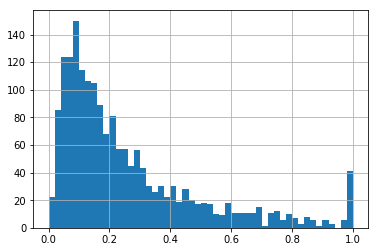

In [9]:
df['PctIlleg'].sample(n = 1800).hist(bins  = 50)

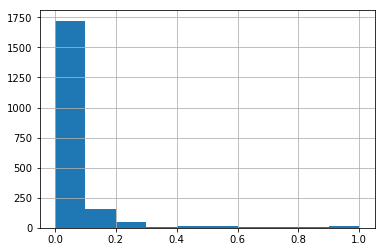

In [10]:
df.population.hist()

# 1. Decision Trees
-------------------------------------

### 1.a) Percentage data

#### Creating highCrime Feature:

In [11]:
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)


#### Train and Target Features:

In [12]:
X = df.drop('ViolentCrimesPerPop',1).drop('highCrime',1).drop('communityname',1).drop('state',1).drop('fold',1)
y = df['highCrime']

In [13]:
pos=df[(df['highCrime'] == 1)]
pos_percentage=len(pos)/len(df)
print('High crime community is',pos_percentage*100,'%')

High crime community is 62.719518314099346 %


#### Decide the depth for tree:
#### Used Validationcurve:[http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html] that has two outputs scores: 
#### 1) Entire dataset  - train_scores
#### 2) Cross Validated dataset - test_scores

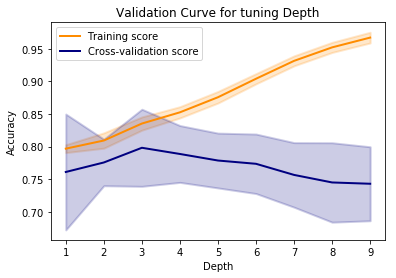

In [14]:
param_range = range(1,10)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, param_name="max_depth", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.title("Validation Curve for tuning Depth")
plt.xlabel("Depth")
plt.ylabel("Accuracy")

lw = 2
plt.plot(param_range,train_scores_mean,label="Training score",color="darkorange",lw=lw)
plt.plot(param_range,test_scores_mean,label="Cross-validation score",color="navy",lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

#### Conclusion: Depth = 3 would be best option, since the accuarcy for 10 cv is higher compared to other depth.

## 1.b DecisionTreeClassifier Model:

#### Prediction using the entire dataset

In [15]:
dtclf = tree.DecisionTreeClassifier(max_depth= 3)
dtclf = dtclf.fit(X,y)

In [16]:
np.count_nonzero(dtclf.feature_importances_)

4

#### Since we train the 3 depth tree, there are only 4 features we condsider to do the classificaiton

In [17]:
print(accuracy_score(y, dtclf.predict(X)))
print(precision_score(y, dtclf.predict(X)))
print(recall_score(y, dtclf.predict(X)))

0.83592574009
0.900260190807
0.8304


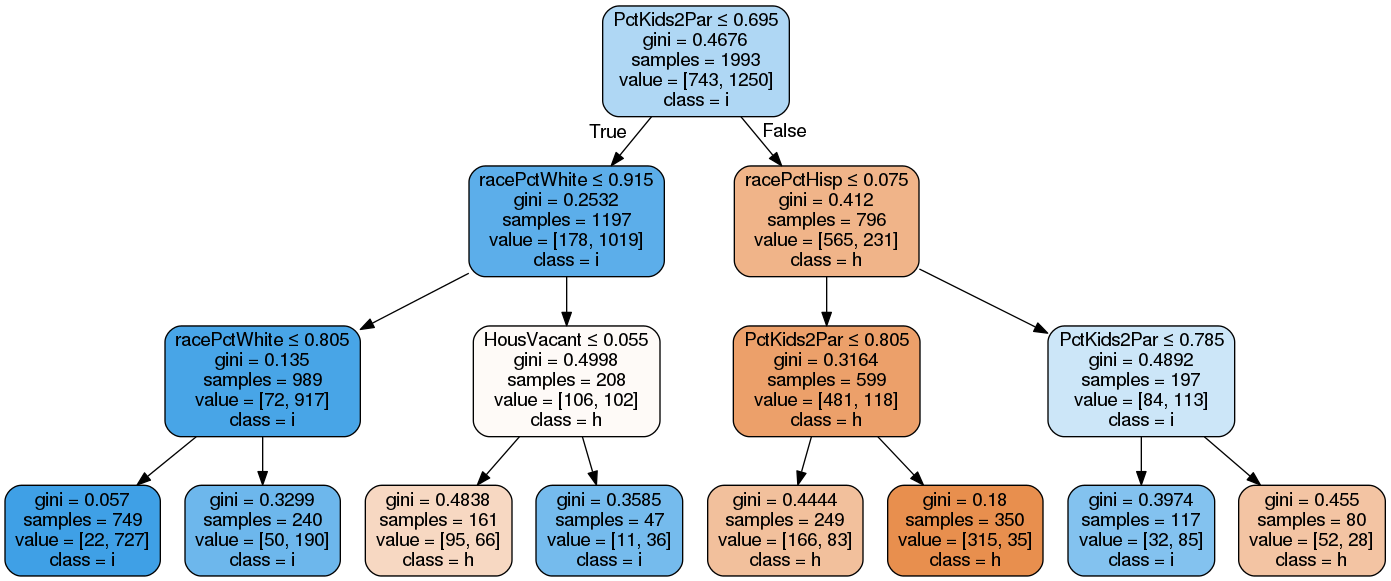

In [18]:
dot_data = tree.export_graphviz(dtclf, out_file=None, 
                         feature_names=list(X),  
                         class_names='highCrime',  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())


### Conclusion: 
### 1.Top of the tree is the main feature-ie PctKids2Par. This is where the dataset is split with high prediction of high crime and low crime.
### 2. Since kids with two parents highly unlikely to commit crime. So here the highcrime and low crime split occurs when 69.5%. That is when PctKids2Par is less than 69.5%(True condition) then that subtree has lowcrime. Other 3 impotant feature are, since depth 3 tree is compareative low tree. : a) racePctWhite b)HousVacant c)racePctHisp

#### C. Prediction using the cross validating dataset

In [19]:
dt_acc_scores = cross_val_score(dtclf, X, y, cv=10, scoring='accuracy').mean()
dt_pre_scores = cross_val_score(dtclf, X, y, cv=10, scoring='precision').mean()
dt_rec_scores = cross_val_score(dtclf, X, y, cv=10, scoring='recall').mean()

In [20]:
print(dt_acc_scores);print(dt_pre_scores);print(dt_rec_scores);

0.798243718593
0.843267479959
0.8392


### Conclusion: 
### From the above validation curve, as the depth increases(from depth=3), the train accuracy increases but the cross validation stop increasing due to overfitting.

# 2.Linear Classification
---------

a. GaussianNB Model:
----

### 2.i) 10 Fold CV:


In [21]:
gnb = GaussianNB()
gnb_acc_scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy').mean()
gnb_pre_scores = cross_val_score(gnb, X, y, cv=10, scoring='precision').mean()
gnb_rec_scores = cross_val_score(gnb, X, y, cv=10, scoring='recall').mean()


print ('Accuracy is', gnb_acc_scores)
print ('Precision is', gnb_pre_scores)
print ('Recall is', gnb_rec_scores)

Accuracy is 0.761608040201
Precision is 0.911799814828
Recall is 0.692


### ii ) 10 most predictive features:

#### Creating a dataframe with the response variable:

In [22]:
count = 0
dictPredFeat = {}
for column in X:
    meanTrue = X[y == 1][column].mean()
    meanFalse = X[y == 0][column].mean()
    varTrue = X[y == 1][column].var()
    varFalse = X[y == 0][column].var()
    if(column != 'highCrime'):
        predScore = abs((meanTrue - meanFalse))/(math.sqrt(varFalse)+math.sqrt(varTrue))
        dictPredFeat[column] = predScore


#### Sort and print the Top 10 features:

In [23]:
TopTenFeat = sorted(dictPredFeat.items(), key=lambda x: x[1])[-10:]
for i in TopTenFeat:
    print(i[0])

MalePctDivorce
PctTeen2Par
pctWInvInc
PctYoungKids2Par
TotalPctDiv
FemalePctDiv
PctIlleg
racePctWhite
PctFam2Par
PctKids2Par


### iii) Comparison with Decision Tree:

#### Conclusion: It is similar to the decision Tree.

## 2.b) LinearSVC:
   --------

In [24]:
svmclf = svm.SVC(kernel='linear', C =1.0)
lsvc_acc_scores = cross_val_score(svmclf, X, y, cv=10, scoring='accuracy').mean()
lsvc_pre_scores = cross_val_score(svmclf, X, y, cv=10, scoring='precision').mean()
lsvc_rec_scores = cross_val_score(svmclf, X, y, cv=10, scoring='recall').mean()

print ('Accuracy is', lsvc_acc_scores)
print ('Precision is', lsvc_pre_scores)
print ('Recall is', lsvc_rec_scores)

Accuracy is 0.804753768844
Precision is 0.855179372789
Recall is 0.8376


### 2.B) Absolute feature weights( ie the coefficients of the hyperplance vector)

In [25]:
svmclf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
TopTenFeat_SVM = {}
count = 0
ls = list()
for i in X.columns:
    TopTenFeat_SVM[i] = abs(svmclf.coef_[0][count])
    count = count+ 1

TopTenFeat = sorted(TopTenFeat_SVM.items(), key=lambda x: x[1])[-10:]
for i in TopTenFeat:
    ls.append(i[0])

In [27]:
ls

['agePct12t21',
 'RentHighQ',
 'PersPerOccupHous',
 'MalePctDivorce',
 'population',
 'PctFam2Par',
 'racepctblack',
 'PctKids2Par',
 'racePctWhite',
 'pctWInvInc']

### iii) Comparison with Decision Tree:


#### conclusion: The Results are different, however, they share 3 features are in the same or really simlar. We can check correlation matrix. HouseVacn has .89 correlation within Population. Thus Main Features are similar with the decision Tree. 

In [28]:
X.corr()[ls].ix[['PctKids2Par','racePctWhite','HousVacant','racePctHisp']]

,agePct12t21,RentHighQ,PersPerOccupHous,MalePctDivorce,population,PctFam2Par,racepctblack,PctKids2Par,racePctWhite,pctWInvInc
PctKids2Par,-0.148922,0.500158,0.265954,-0.710124,-0.274154,0.985327,-0.735622,1.000000,0.701368,0.744271
racePctWhite,-0.194137,0.119562,-0.215168,-0.341308,-0.301540,0.637265,-0.793863,0.701368,1.000000,0.595801
HousVacant,-0.047199,-0.072262,-0.167369,0.323930,0.896325,-0.344443,0.280897,-0.346290,-0.281461,-0.184022
racePctHisp,0.145783,0.059832,0.507974,0.062722,0.156149,-0.138050,-0.065837,-0.205878,-0.445371,-0.417612


# 3.Regression
---------

### a. Linear Regression:


In [29]:
y_reg = df['ViolentCrimesPerPop']
# print(y_reg)
lr = LinearRegression()
lr_scores = cross_val_score(lr, X, y_reg,None,scoring='neg_mean_squared_error',cv=10)

### a)Using 10-fold cross-validation, what is the estimated mean-squared-error (MSE) of the model?

In [30]:
print(np.abs(lr_scores.mean()))
# print(scores)

0.0200939693044


### II) What is the MSE on the training set

In [31]:
lr.fit(X,y_reg)
print("Mean squared error: %.2f"
      % np.mean((lr.predict(X) - y_reg) ** 2))

Mean squared error: 0.02


### III) What features are most predictive of a high crime rate? A low crime rate?
-----------------


#### It’s easy to think that variables with larger coefficients are more important because they represent a larger change in the response.Since the features scale has been standardized, we can pick highest and lowest coefficent for the most predictive value.

In [32]:
print('Coefficients: \n', lr.coef_)
ls_coef_lr = np.array(lr.coef_)
max_feature = np.where(ls_coef_lr == ls_coef_lr.max())

Coefficients: 
 [ 0.18396339 -0.02231606  0.20493383 -0.04915604 -0.0144296   0.06087618
  0.11035749 -0.22921784 -0.13016221  0.04974446 -0.29644254  0.04670138
 -0.19982858 -0.20157396  0.04875141 -0.1731211   0.0761747   0.00495907
 -0.09000184  0.28797887  0.09551562 -0.35101577 -0.02875531 -0.03571694
  0.02164703  0.04380689  0.03572849  0.11115737 -0.17214385 -0.09991658
  0.05254806  0.05038826  0.00454329  0.24847432 -0.06583291 -0.02673461
  0.07234625  0.12263071  0.45851705  0.22672791  0.16273332 -0.56192431
 -0.14049326  0.01859592 -0.32265128 -0.03230383 -0.00294581  0.05915826
 -0.18611198 -0.13768061  0.1215016  -0.14411742  0.02206421  0.03594264
 -0.07777426  0.03363794 -0.02533207 -0.21822101  0.43251056 -0.18125139
 -0.02538104 -0.15180678  0.04530161 -0.19910488  0.63508812 -0.07049674
 -0.25457166 -0.67569448  0.21435256  0.1025989   0.03042671  0.15874822
 -0.04808195  0.56813321  0.04924214 -0.07892199 -0.02576789  0.00316608
 -0.01404768 -0.30817022  0.2128758

#### Most predictive toward high crime:

In [33]:
X.columns[np.argmax(ls_coef_lr)]

'PersPerOccupHous'

####  Most predictive toward low crime :

In [34]:
X.columns[np.argmin(ls_coef_lr)]

'PctPersOwnOccup'

## b.Ridge Regression
------------------

In [35]:
param_range = np.logspace(-3, 1, 5)
train_scores, test_scores = validation_curve(
    linear_model.Ridge (), X, y_reg, param_name="alpha", param_range=param_range,
    cv=10, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(param_range)

[  1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00
   1.00000000e+01]


### I) What is the Estimated MSE 10 CV for each Alpha:

In [36]:
test_scores_mean

array([-0.02008953, -0.02005596, -0.01991972, -0.01979502, -0.02003425])

### II) What is the MSE on the training set

In [37]:
train_scores_mean

array([-0.01635697, -0.01635838, -0.01639336, -0.01664036, -0.01748985])

### III)  What is the best alpha?

#### We would pick 0.0001 as the alpha. Since the main goal for ridge linar regression is to prevent overfitting.
#### Take the 10 CV as the benchmark

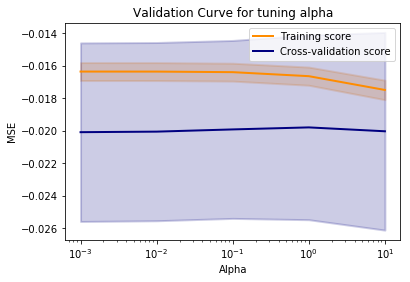

In [38]:
plt.title("Validation Curve for tuning alpha")
plt.xlabel("Alpha")
plt.ylabel("MSE")

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### IV) What does this say about the amount of overfitting in linear regression for this problem?

#### For the validation curve above, there is no big difference between the alpha value changing.
#### It explain that the overfitting is not series in the linear regression

In [39]:
lrr = linear_model.Ridge(alpha = 0.001)

In [40]:
lrr.fit(X,y_reg)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [41]:
print("Mean squared error: %.2f"
      % np.mean((lrr.predict(X) - y_reg) ** 2))

Mean squared error: 0.02


## C.polynomial features
--------

In [42]:
poly = PolynomialFeatures(degree  = 2,interaction_only = False)
poly_init = poly.fit_transform(X)

param_range = [2,3,4,5]
train_scores, test_scores = validation_curve(
    PolynomialFeatures(), initial, Y, param_name="degree", param_range=param_range,
    cv=10, scoring="neg_mean_squared_error", n_jobs=1)

Crete polynomial feature

In [43]:
lrr.fit(poly_init,y)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
print("Mean squared error: %.2f"
      % np.mean((lrr.predict(poly_init) - y_reg) ** 2))

Mean squared error: 0.30


In [45]:
df_poly = pd.DataFrame(poly_init)

In [46]:
X.shape

(1993, 100)

In [47]:
poly_init.shape

(1993, 5151)

In [48]:
lrr = linear_model.Ridge(alpha = 0.001)
scores = cross_val_score(lrr, poly_init, y_reg,None,scoring='mean_squared_error',cv=10,n_jobs = -1)

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metri

In [49]:
scores

array([-0.14227491, -0.13626447, -0.18361291, -0.09502172, -0.07243209,
       -0.1266391 , -0.08427071, -0.06765191, -0.16015351, -0.12677151])

In [50]:
print(scores.mean())

-0.119509285845


### II) What is the MSE on the training set

#### Is 0.00

### III) Does this mean the quadratic model is better than the linear model for this problem?

#### Not necessary,  since the 10 cv value are not that good.  Hyper plane linear regession could cause series overfitting.  Comapre with linear regression. 0.02 and 0.12 . Polynomial regression isn't better. It's not surprised, since the decision tree and linear svc doing well on this dataset.

# 4.Dirty Data
---------

#### Finding the extra features

In [51]:
ls_col_desc_dfd = np.array(dfd.describe().columns)
ls_col_head_dfd = np.array(dfd.head().columns)
np.intersect1d(ls_col_desc_dfd,ls_col_head_dfd)
np.setdiff1d(ls_col_head_dfd,ls_col_desc_dfd)


array(['LemasGangUnitDeploy', 'LemasPctPolicOnPatr', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasSwFTPerPop', 'LemasSwornFT',
       'LemasTotReqPerPop', 'LemasTotalReq', 'NumKindsDrugsSeiz',
       'OfficAssgnDrugUnits', 'OtherPerCap', 'PctPolicAsian',
       'PctPolicBlack', 'PctPolicHisp', 'PctPolicMinor', 'PctPolicWhite',
       'PolicAveOTWorked', 'PolicBudgPerPop', 'PolicCars', 'PolicOperBudg',
       'PolicPerPop', 'PolicReqPerOffic', 'RacialMatchCommPol',
       'community', 'communityname', 'county'], dtype=object)

In [52]:
dfd = pd.read_csv(dicPathDirty)


There 2 Way to replace ? mark. 1. replace  2. appmap
1.

In [53]:
dfd_clean = dfd.replace('?',np.nan)

In [54]:
y_train = np.where(dfd_clean['ViolentCrimesPerPop']>0.1, 1, 0)
y_lr_dirty = dfd_clean['ViolentCrimesPerPop']
del dfd_clean['communityname']
del dfd_clean['county']
del dfd_clean['community']
del dfd_clean['state']
del dfd_clean['ViolentCrimesPerPop']
del dfd_clean['fold']

In [55]:
cols_numeric = dfd_clean.columns

In [56]:
imputer = Imputer(missing_values = np.nan,
                                          strategy="mean",
                                          axis=0)

In [57]:
dfd_clean = imputer.fit_transform(dfd_clean)
dfd_clean = pd.DataFrame(dfd_clean)
dfd_clean.columns = cols_numeric

In [58]:
np.random.seed(40)

In [59]:
dfd_cleanclf = tree.DecisionTreeClassifier(max_depth= 3)
scores = cross_val_score(dfd_cleanclf, dfd_clean,y_train,None,scoring='accuracy',cv=10)

In [60]:
print(scores.mean())

0.812946286157


In [61]:
dfd_cleanclf = tree.DecisionTreeClassifier(max_depth= 3)
scores = cross_val_score(dfd_cleanclf, dfd_clean,y_train,None,scoring='accuracy',cv=10)

In [62]:
print(scores.mean())

0.812946286157


### a. Are the CV results better or worse? What does this say about the effect of missing values?

#### The CV data in the clean dataset is a little better in performance. It can't tell is worse or better, since we fillin na data with mean. the data can be affect by the bed data. Since we only require to do classification for the data

In [63]:
lr_1 = LinearRegression()
scores = cross_val_score(lr_1, dfd_clean,y_lr_dirty,None,scoring='neg_mean_squared_error',cv=10)

In [64]:
scores

array([-0.02121564, -0.01844588, -0.02707768, -0.02192117, -0.01814902,
       -0.01611808, -0.01646397, -0.01516592, -1.80914073, -0.01980083])

#### you can see there's one particulr partition in 10 cv has really high error. It's due to filling missing data. We need to also consider the missing rate. If missing rate really high. We fillin the mean value can cause std really low. The del could be harmful for some dataset.

# 5. TEAM WORK
---------

## i) Two Learning Methods:

## Model1:RadomForeset
--------------------------

### Finding the Depth:

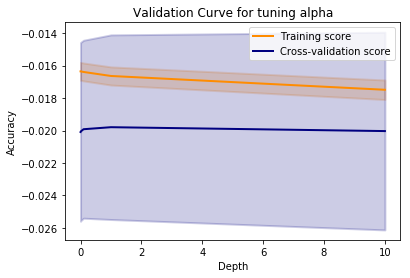

In [65]:
plt.title("Validation Curve for tuning alpha")
plt.xlabel("Depth")
plt.ylabel("Accuracy")

lw = 2
#plt.semilogx(param_range, train_scores_mean, label="Training score",
#             color="darkorange", lw=lw)
plt.plot(param_range,train_scores_mean,label="Training score",color="darkorange",lw=lw)
plt.plot(param_range,test_scores_mean,label="Cross-validation score",color="navy",lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
#plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
#             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [66]:
rf_clf = RandomForestClassifier(random_state=100, max_depth=3)

rf_acc_scores = cross_val_score(rf_clf, X, y, cv=10, scoring='accuracy').mean()
rf_pre_scores = cross_val_score(rf_clf, X, y, cv=10, scoring='precision').mean()
rf_rec_scores = cross_val_score(rf_clf, X, y, cv=10, scoring='recall').mean()

In [67]:
rf_clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=100,
            verbose=0, warm_start=False)

In [68]:
lsRF = list()
TopTenvalues = pd.Series(rf_clf.feature_importances_).nlargest(10)
for i in TopTenvalues.index:
    lsRF.append(i)

In [69]:
print ('Accuracy is', rf_acc_scores)
print ('Precision is', rf_pre_scores)
print ('Recall is', rf_rec_scores)

Accuracy is 0.801253768844
Precision is 0.83338783622
Recall is 0.8616


In [70]:
param_range = range(1,10)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X, y, param_name="max_depth", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

## Model2:Nonlinear SVM
---------------------

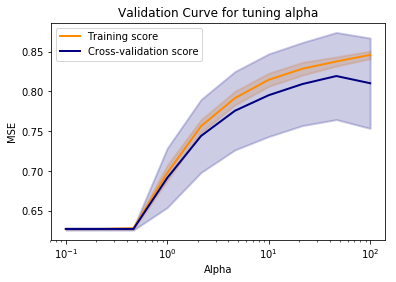

In [71]:
param_range = np.logspace(-1, 2, 10)
train_scores, test_scores = validation_curve(
    svm.SVC(kernel='poly'), X, y, param_name="C", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve for tuning alpha")
plt.xlabel("Alpha")
plt.ylabel("MSE")

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [72]:
test_scores_mean

array([ 0.62719849,  0.62719849,  0.62719849,  0.69139698,  0.74406281,
        0.77566332,  0.79523116,  0.80928894,  0.81932412,  0.81029397])

In [73]:
param_range

array([   0.1       ,    0.21544347,    0.46415888,    1.        ,
          2.15443469,    4.64158883,   10.        ,   21.5443469 ,
         46.41588834,  100.        ])

In [ ]:
svmclf = svm.SVC(kernel='poly', C =46)
nsvm_acc_scores = cross_val_score(svmclf, X, y, cv=10, scoring='accuracy').mean()
nsvm_pre_scores = cross_val_score(svmclf, X, y, cv=10, scoring='precision').mean()
nsvm_rec_scores = cross_val_score(svmclf, X, y, cv=10, scoring='recall').mean()

print ('Accuracy is', nsvm_acc_scores)
print ('Precision is', nsvm_pre_scores)
print ('Recall is', nsvm_rec_scores)

Accuracy is 0.818319095477
Precision is 0.851133123637
Recall is 0.8696


# Extra Credit: K-Means
---------

In [ ]:
from sklearn.cluster import KMeans
kmClf = KMeans(n_clusters = 2)
km_acc_scores = cross_val_score(kmClf, X, y, cv=10, scoring='accuracy').mean()
km_pre_scores = cross_val_score(svmclf, X, y, cv=10, scoring='precision').mean()
km_rec_scores = cross_val_score(svmclf, X, y, cv=10, scoring='recall').mean()

print ('Accuracy is', km_acc_scores)
print ('Precision is', km_acc_scores)
print ('Recall is', km_acc_scores)

### The above K-Means is not the perfect model for labeled data that predicts a category.Hence it shows varriying cross validated metrics mean value on each run

# Comparasion Accuracy Graph for Each Model:
------------------------------



### Best classification model based on Accuracy metrics on the clean dataset:

In [ ]:
names = ["Decision Tree","Gaussian NB", "Linear SVM", "Nonlinear SVM" ,"Random Forest"]
acc_scores_list = [dt_acc_scores,
gnb_acc_scores,
lsvc_acc_scores,
rf_acc_scores,
nsvm_acc_scores
]
pre_scores_list = [dt_pre_scores,
gnb_pre_scores,
lsvc_pre_scores,
rf_pre_scores,
nsvm_pre_scores
]
rec_scores_list = [dt_rec_scores,
gnb_rec_scores,
lsvc_rec_scores,
rf_rec_scores,
nsvm_rec_scores
]


F1_scores_list = stats.hmean([ rec_scores_list , pre_scores_list ])

In [ ]:
#plot:
xaxisRange = range(5)
plt.xticks(xaxisRange, names)
plt.xticks(xaxisRange, names, rotation=45)
# plt.legend()

plt.plot(xaxisRange,acc_scores_list,'*',color="Red",label="Accuracy")
plt.plot(xaxisRange,pre_scores_list,'>',color="green",label="Precision")
plt.plot(xaxisRange,rec_scores_list,'+',color="Blue",label="Recall")
plt.plot(xaxisRange,F1_scores_list,'+',color="orange",label="F1")
plt.xlabel('Model')
plt.ylabel('Metrics')
legend = plt.legend()

### Conclusion: Random Forest is the best model. As the metrics are greater than other model's metrics.

### iii) Most Predictive Feature:

In [ ]:
for i in lsRF:
    print(X.columns[i])

### Reliability of Conclusion: The Main features also appear in the Decision Tree and SVM like the racePctWhite, PctFam2Par and pctWInvInc, racepctblack.This model is better compared to others.